# Лабораторная работа №4
## Выполнил : Пелагеев Даниил Иванович Б9122-01.03.02мкт
### Продолжаем мой теперь любимый датасет с пшеницой

# Информация по датасету:
Это у нас датасет с пшеницой

Признаки: 
- Area — площадь семени.
- Perimeter — периметр семени.
- Compactness — компактность семени (рассчитывается как ￼).
- Length of kernel — длина ядра.
- Width of kernel — ширина ядра.
- Asymmetry coefficient — коэффициент асимметрии.
- Length of kernel groove — длина борозды ядра.

Классы: 
- Kama (Кама).
- Rosa (Роза).
- 3: Canadian (Канадская пшеница).


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline

In [3]:
data = 'seeds_dataset.txt'
columns = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient',
           'Length of kernel groove', 'Class']  # Добавили названия столбцам 

df = pd.read_csv(data, sep='\t', names=columns)
print('Размерность датасета:', df.shape, end='\n\n')
df.head(10)

Размерность датасета: (210, 8)



,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [5]:
df.info()
df = df.dropna()  # Чистим наш датасет от na
print('Размерность датасета после чистки:', df.shape, end='\n\n')
df["Class"] = df["Class"].replace(
    {1: "Kama", 2: "Rosa", 3: "Canadian"})  # Меняем на более удобное(для нас) представление 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB
Размерность датасета после чистки: (210, 8)



In [6]:
dX = df.drop('Class', axis=1)
dy = df['Class']

print(dX.head(), end='\n\n')
print(dy.head())

    Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry coefficient  Length of kernel groove  
0                  2.221                    5.220  
1                  1.018                    4.956  
2                  2.699                    4.825  
3                  2.259                    4.805  
4                  1.355                    5.175  

0    Kama
1    Kama
2    Kama
3    Kama
4    Kama
Name: Class, dtype: object


In [7]:
X_train, X_holdout, y_train, y_holdout = \
train_test_split(dX, dy, test_size=0.3, random_state=27)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=6,
                              random_state=21,
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.9206349206349206


Если не трогать другие значения и поставить `max_depth =  6`, то точность наиболее высокая, остальные характеристик не стал перебирать, сделаю в следующем пункте

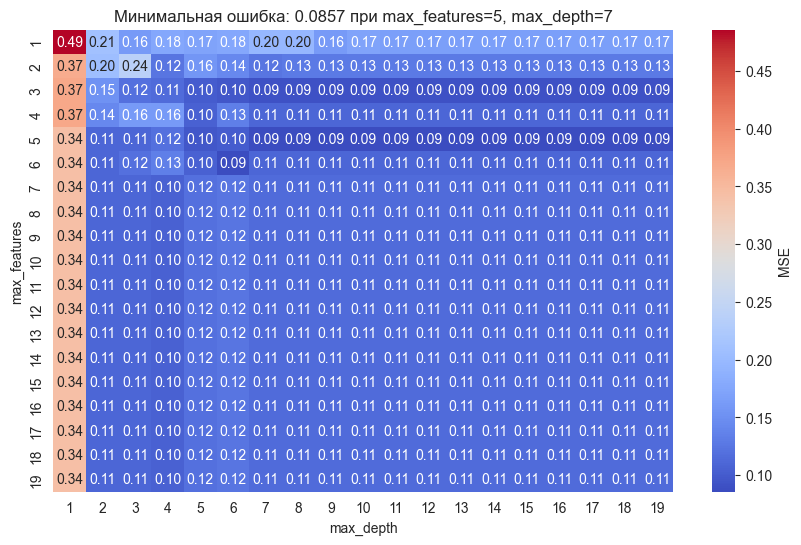

In [8]:
# Значения параметров
f_list = list(range(1, 20))
d_list = list(range(1, 20))

# Пустой список для хранения значений точности
cv_scores = []

# В цикле проходим все значения f_list и d_list
for f in f_list:
    for d in d_list:
        tree = DecisionTreeClassifier(max_depth=d, random_state=21, max_features=f)
        scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

# Вычисляем ошибку
MSE = [1 - x for x in cv_scores]

# Преобразуем MSE в матрицу для визуализации
MSE_matrix = np.array(MSE).reshape(len(f_list), len(d_list))

# Находим минимальное значение MSE и соответствующие параметры
min_MSE = np.min(MSE_matrix)
min_index = np.unravel_index(np.argmin(MSE_matrix), MSE_matrix.shape)
optimal_f = f_list[min_index[0]]
optimal_d = d_list[min_index[1]]

# Используем seaborn для построения графика
plt.figure(figsize=(10, 6))
ax = sns.heatmap(MSE_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=d_list, yticklabels=f_list, cbar_kws={'label': 'MSE'})

# Настраиваем заголовок и оси
ax.set_title(f'Минимальная ошибка: {min_MSE:.4f} при max_features={optimal_f}, max_depth={optimal_d}')
ax.set_xlabel('max_depth')
ax.set_ylabel('max_features')

# Отображаем график
plt.show()

Из-за большого количества данных нет возможности вывести нормальные цифры на тепловой карте, но при вычисления получилось выявить минимальную ошибку равную 0.0857

P.S. Тепловая карта от matplotlib такое г((

In [9]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(dX, dy)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

# Генерируем графическое представление лучшего дерева (сохранится в файле)
export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file='iris_tree.dot',
                     filled=True, rounded=True)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 7, 'max_features': 3}
Лучшие баллы cross validation:  0.9095238095238096


Видимой я зря делал метод выше, потому что он медленный и ошибка всего на 0.006

Оптимальное дерево решений


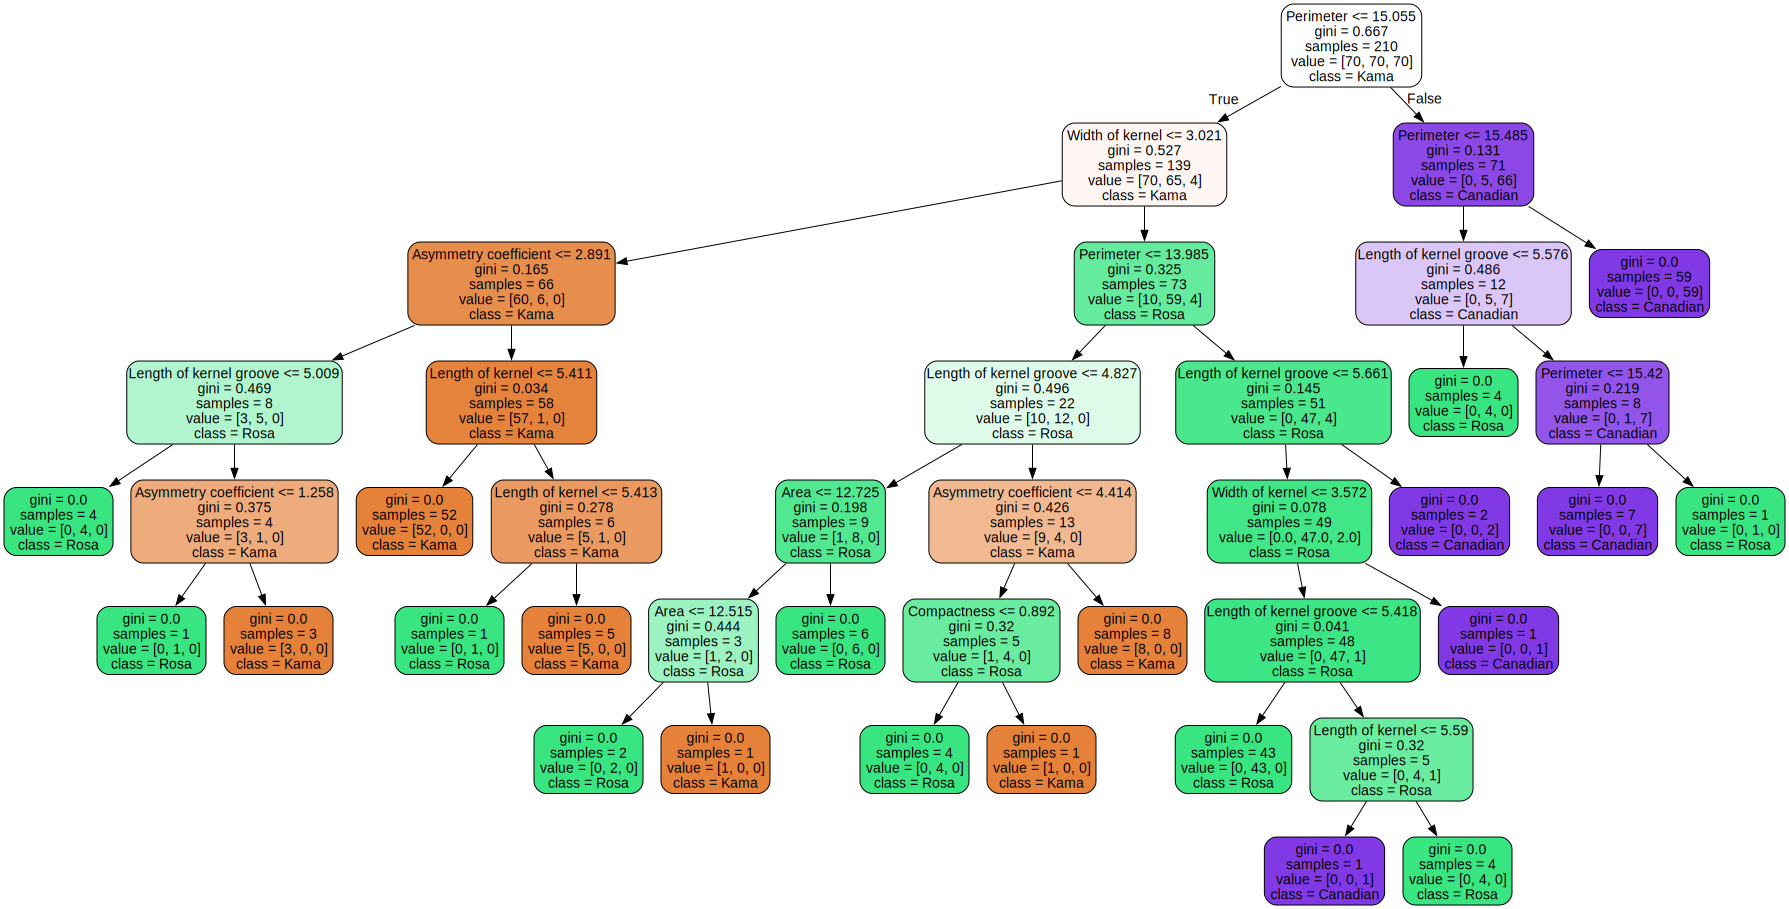

In [10]:
dot_data = export_graphviz(tree_grid.best_estimator_,
                                feature_names=dX.columns,
                                class_names=dy.unique(),
                                out_file=None,
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
print('Оптимальное дерево решений')
graph

gini - определяет однородность группы в узле
samples - показывает сколько данных попадает на каждом этапе классификации в конкретный узел
value - показывает сколько объектов определенного класса в конкретном узле

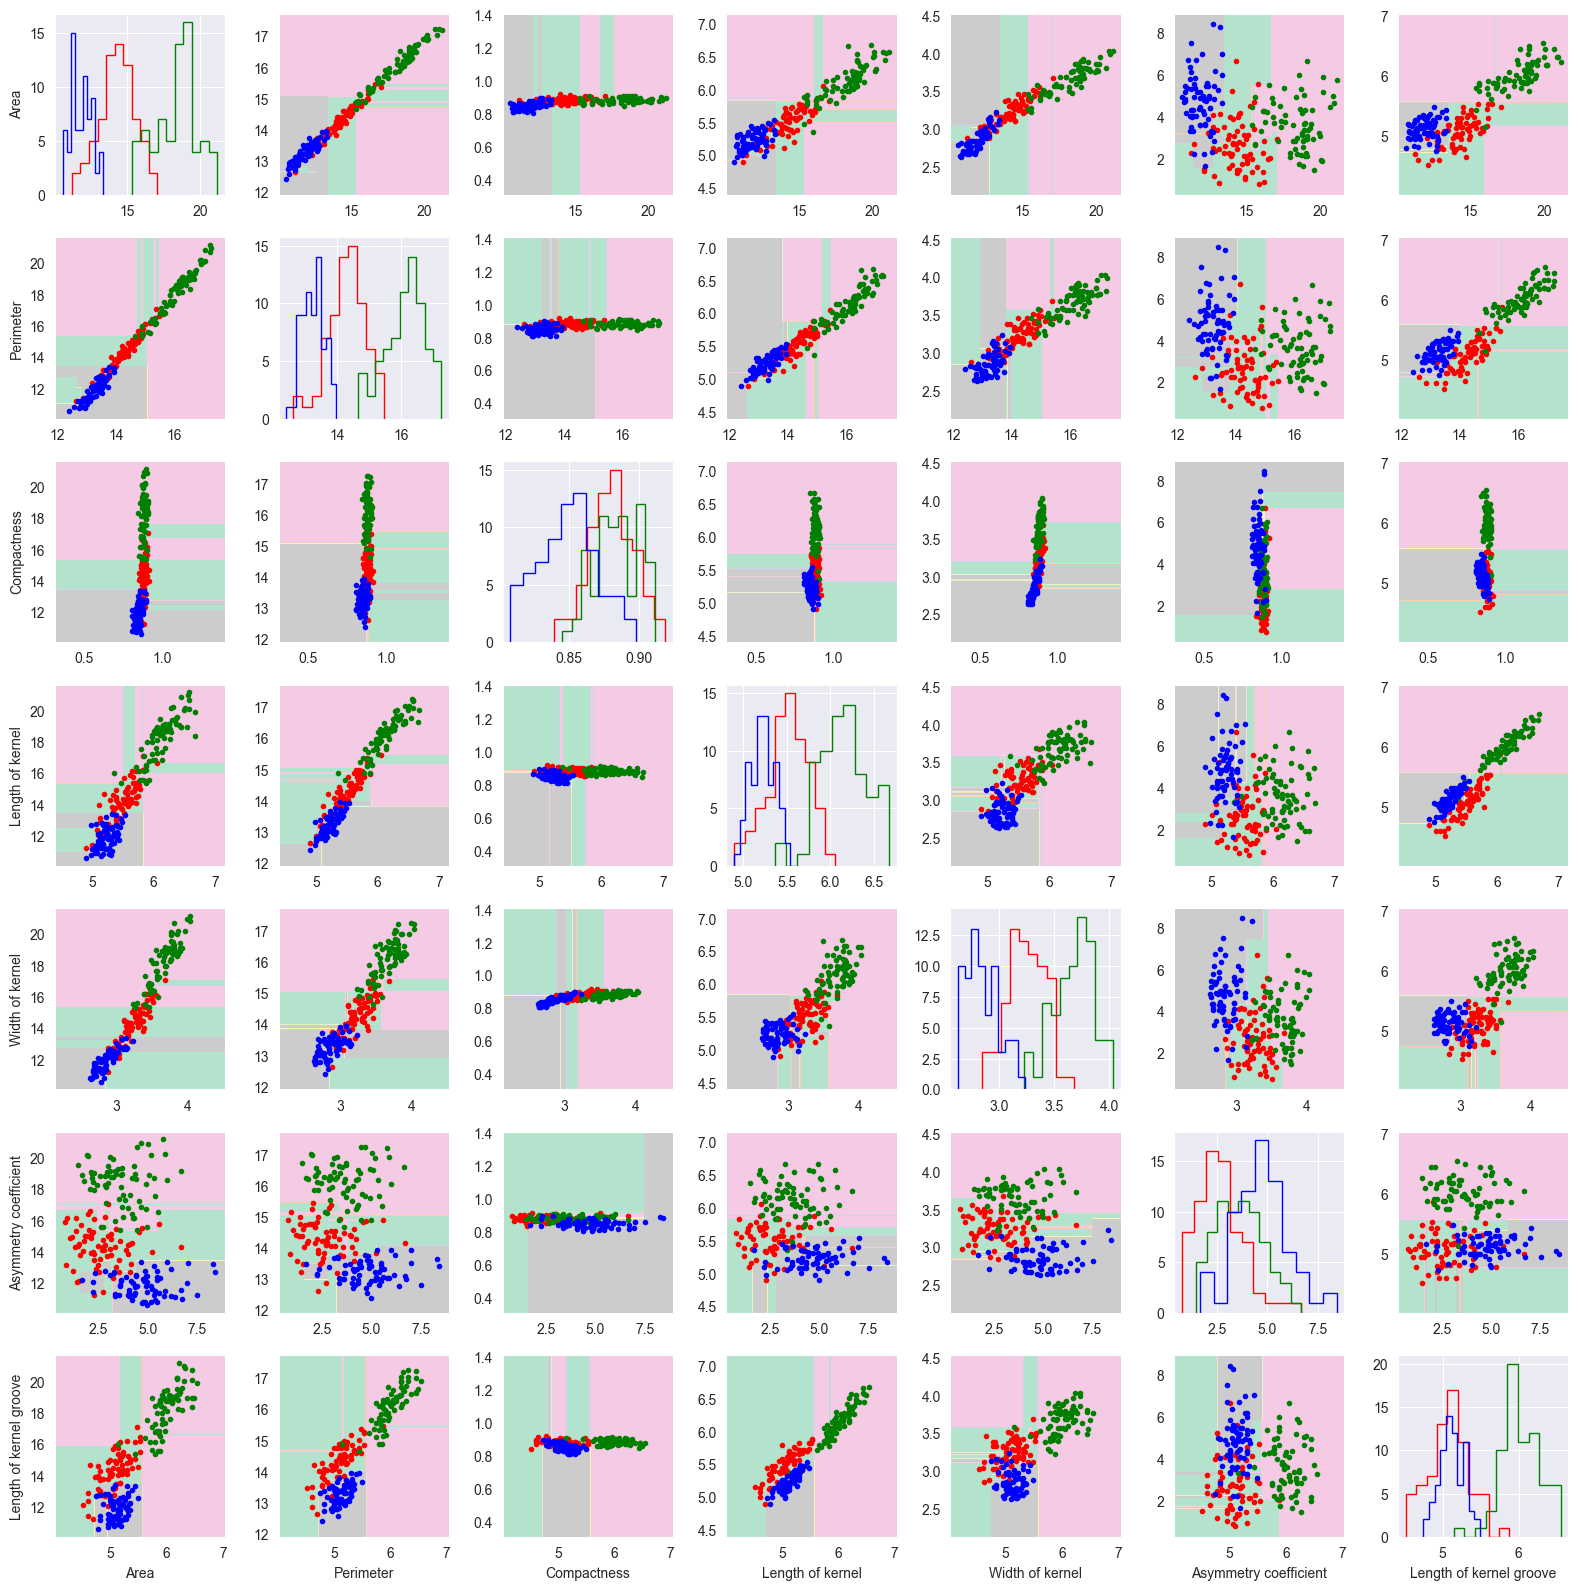

In [18]:
plot_markers = ['r', 'g', 'b']
answers = dy.unique()
labels = dX.columns.values
# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(7, 7, figsize=(16,16))

fmin = dX.min().values - 0.5
fmax = dX.max().values + 0.5
plot_step = 0.02

# Обходим все subplot
for i in range(7):
    for j in range(7):

        # Строим решающие границы
        if i != j:
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step, dtype=float),
                                 np.arange(fmin[j], fmax[j], plot_step, dtype=float))
            model = DecisionTreeClassifier(max_depth=7, random_state=21, max_features=3)
            model.fit(dX.iloc[:, [i, j]].values, dy.values)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)

            # Преобразуем метки для классов
            for id_answer, answer in enumerate(answers):
                p[p == answer] = id_answer

            p = p.astype('int32')
            places[i, j].contourf(xx, yy, p, cmap=plt.cm.Pastel2)

        # Обход всех классов (Вывод обучающей выборки)
        for id_answer in range(len(answers)):
            idx = np.where(dy.values == answers[id_answer])
            if i == j:
                places[i, j].hist(dX.iloc[idx].iloc[:, i],
                                  color=plot_markers[id_answer],
                                  histtype='step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:, i], dX.iloc[idx].iloc[:, j],
                                  marker='.', linestyle='',
                                  color=plot_markers[id_answer],
                                  label=answers[id_answer], markersize=6)

        # Печать названия осей
        if j == 0:
            places[i, j].set_ylabel(labels[i])

        if i == 6:
            places[i, j].set_xlabel(labels[j])

# Настраиваем отображение
plt.tight_layout()
plt.show()

На некоторых гистограммах класс хорошо разделяются, это следствие того, что данные легко классифицируются. Эта визуализация, помогает точнее понять по каким будет легче классифицировать